<a href="https://colab.research.google.com/github/Geon27/3-2-googlecolab/blob/main/%EA%B5%AC%EA%B8%80%ED%8A%B8%EB%A0%8C%EB%93%9C_%ED%8C%80%ED%94%8C_0605_%EC%A4%80%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **구글 트렌드와 외래관광객 실태 설문지를 활용한 대만 관광객분석**
# **(Google Colab을 통한 분석)**


**1686067 신원재    1786071 육건    2093045 이다현**

## **한글폰트 사용을 위한 셋팅**

* 코랩에서 한글폰트를 사용하기 위해 실행해야 함
* 한편 아래코드는 두번 실행을 해야 하는데 한번 실행 후 **런타임을 다시시작 (ctrl + M .)** 한뒤 한번 더 실행 해야함
* 영역을 한번에 실행하기: **(Ctrl + Shift + Enter)**
* 셀만 실행하기: **(Ctrl + Enter)**

In [ ]:
# http://corazzon.github.io/matplotlib_font_setting
# 한글폰트 불러오기: 런타임을 다시 시작한 후 적용되기 때문에 실행 후
# 런타임 다시 시작 후 다시 한번 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic') 
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,829 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

* 아래 코드를 사용하여 한글세팅 확인을 위한 임의 데이터 생성
* 아래 코드를 실행할 때 만약 한글 셋팅이 잘 안되었다면 그래프가 깨지게 됨

Text(0.5, 0, '시간(분)')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

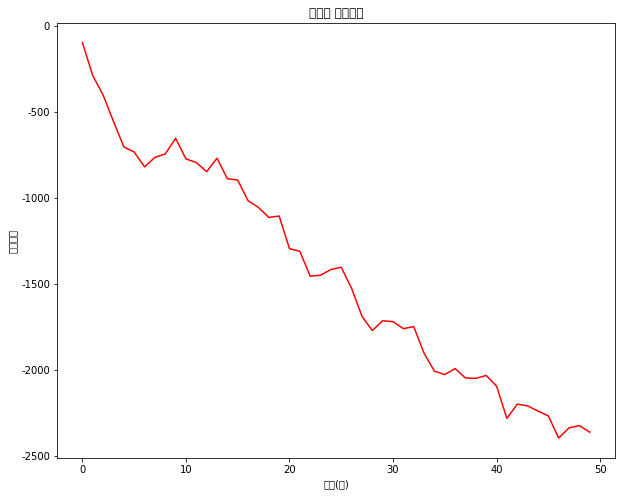

In [ ]:
# 데이터 준비
import numpy as np
#임의 데이터 생성
data = np.random.randint(-200, 100, 50).cumsum()
plt.figure(figsize=(10,8)); plt.plot(range(50), data, 'r'); plt.title('시간별 가격추이')
plt.ylabel('주식가격'); plt.xlabel('시간(분)')

# **기본 시스템 세팅**


---




1.  구글 드라이브 연동
2.  구글 코랩의 작업환경과 구글 드라이브의 작업폴더 동기화





* 구글 드라이브 연동**(구글 계정 필수)**

In [ ]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive') 

# 아래 출력되는 URL에 접속하여 이용 동의 후 생성되는 인증코드를 복사해서 붙여넣기

Mounted at /content/drive


* 구글 드라이브와 동기화를 위해 폴더설정 및 경로설정

In [ ]:
# 폴더설정, 같은 런타임에서 두번실행할때 에러 발생하지만 문제는 아님
import os, sys
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

In [ ]:
# 작업할 경로를 google drive가 있는 위치로 변경(작업폴더설정)
os.chdir('/content/drive/MyDrive/Colab Notebooks/') 
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

## **R추가 사용을 위한 셋팅**

---
1.   R magic설정

2.   패키지의 경로를 지정
3.  리눅스 형태로 설치해야 하는 패키지 설치

4. 패키지 개별설치 자동로드
5. 패키지 자동설치 자동로드
6. 파이썬 패키지 설치 및 장소 지정
7. 추가 파이썬 패키지 한번에 인스톨
8. 필요한 파이썬 패키지 로드

<U> **위 사항들을 모두 정상적으로 마쳐야 분석을 실행할 때 에러가 발생하지 않는다.**



In [ ]:
#R magic설정
# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 설치되어 있는 패키지 확인 및 라이브러리 경로 설정
%%R
#print(library())
.libPaths("/content/drive/MyDrive/Colab Notebooks/r-lib")

In [ ]:
# 1.리눅스 형태로 설치안되는 패키지 설치 (필요시 계속 추가)
!sudo apt-get install -y libv8-dev # V8
!sudo apt install libmagick++-dev  # Magick++ for summarytools, 불가할때 있음

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libv8-3.14.5
The following NEW packages will be installed:
  libv8-3.14.5 libv8-dev
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,272 kB of archives.
After this operation, 4,534 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libv8-3.14.5 amd64 3.14.5.8-11ubuntu1 [1,214 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libv8-dev amd64 3.14.5.8-11ubuntu1 [57.7 kB]
Fetched 1,272 kB in 2s (637 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> li

In [ ]:
# 2.패키지 개별설치 자동로드
%%R
if (!require(DiagrammeRsvg)) {install.packages("DiagrammeRsvg") 
   library(DiagrammeRsvg)}
if (!require(DiagrammeR)) {install.packages("DiagrammeR") 
   library(DiagrammeR)}
if (!require(magrittr)) {install.packages("magrittr") 
   library(magrittr)}
# if (!require(rsvg)) {install.packages("rsvg") 
   #library(rsvg)}
#if (!require(summarytools)) {install.packages("summarytools") #, 불가할때 있음
#  library(summarytools)}
#if (!require(rsvg)) {install.packages("rcorr") 
#   library(rcorr)}
if (!require(pacman)) {install.packages("pacman")
   library(pacman)}
pacman::p_load("corrplot", "stargazer", "plotly", "openxlsx","ggplot2", #  "lazyeval"
          "readxl","dplyr","htmltools", "sjmisc","lawstat",
          "lawstat","Hmisc","gmodels", "car", "equatiomatic", "report") # "webr","moonBook",

R[write to console]: Loading required package: DiagrammeRsvg

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘Rcpp’, ‘V8’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Rcpp_1.0.8.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3086192 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

In [ ]:
## 3.패키지 자동설치 자동로드
%%R
packages = c("astsa","openxlsx","Hmisc","stargazer","corrplot")#"rsvg")
package.check <- lapply(packages, FUN = function(x) {
  if (!require(x, character.only = TRUE)) {
    install.packages(x, dependencies = TRUE)
    library(x, character.only = TRUE)}})

R[write to console]: Loading required package: astsa

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/astsa_1.15.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 639906 bytes (624 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

#**구글 코랩에서 파이썬 사용을 위한 셋팅**

## **패키지 설치 및 로드**
---
1. 파이썬 라이브러리 경로설정
2. 파이선 패키지 설치 경로설정과 한번에 인스톨 (인스톨 후 #처리)
3. 경로설정과 인스톨이 이전에 잘 되었다면 인스톨 과정없이 바로 패키지 로드 가능

In [ ]:
# 파이썬 라이브러리 경로지정
import sys
print(sys.path)
sys.path.append('/content/drive/MyDrive/Colab Notebooks/package_collection')

['/content/notebooks', '', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
# 추가 파이썬 패키지 위치설정과 함께 한번에 인스톨
!pip install --target=$nb_path pytrends plotly openpyxl numpy pandas matplotlib FinanceDataReader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 4.2 MB/s 
     |████████████████████████████████| 242 kB 64.7 MB/s 
     |████████████████████████████████| 15.7 MB 55.6 MB/s 
     |████████████████████████████████| 11.3 MB 33.1 MB/s 
     |████████████████████████████████| 11.2 MB 45.2 MB/s 
ERROR: Could not find a version that satisfies the requirement FinanceDataReader (from versions: none)
ERROR: No matching distribution found for FinanceDataReader


In [ ]:
# 경제데이터를 가져오는 패키지
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.3 MB/s 


In [ ]:
pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pytrends-4.8.0.tar.gz (19 kB)
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=73b06d3c9303f7b0d35d2c582041d3685689dcf49babf276b96c892b378da532
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [ ]:
# 필요 imports
import numpy as np
import pandas as pd
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

from pytrends.request import TrendReq
from tkinter import *
#import tkinter.filedialog
import matplotlib.font_manager as fm

import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.offline as pyo
init_notebook_mode(connected=True)
from IPython.display import HTML
import plotly.express as px

from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

import urllib.request, datetime, time, json

#**구글 코랩에서 파이썬과 R을 이용한 구글 트렌드 활용**

> # 구글트렌드란?
* 구글 트렌드는 전 세계 구글 검색량을 기반으로 트렌드를 예측하는 도구로 사용됨.
* 구글 검색사이트에서 여러 용어들을 검색할 수 있고 이에 대한 빈도,관련내용 등이 축척된 것이 구글 트렌드 웹사이트이다.
* 사람들은 관심 있는 것을 더 많이 검색한다.'라는 가정에 근거해 볼 때 해당 키워드 검색량이 많을수록 인지도는 크다고 할 수 가 있다.
* **장점**: 몇 년 치의 통계 데이터를 지표(SVI, search volume index)로 볼 수 있어서 검색어에 대한 변화추이를 볼 수 있다.
* **단점**: 이 검색량은 구글에서만 한정되므로 구글을 적게 사용하는 나라에서는 그 신뢰도가 떨어진다고 할 수 있다.

#### 구글트렌드의 카테고리 사이트 주소

#### [Google Trends Categories](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)





# **분석환경설정**

#### 앞에서 한번에 파이썬 패키지가 설치되지않았다면 핵심 패키지만 아래에서 인스톨, 잘 설치된 경우 생략가능

In [ ]:
#### 패키지 인스톨 및 로드
!pip install pytrends
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **키워드 설정**
1.   pytrends 호출
2.   pytrends 설정






In [ ]:
###############################################################
###################### pytrends 호출  ##########################
###############################################################
pytrend = TrendReq()

# 대만 관광객 분석

In [ ]:
kw_list=["韓國觀光", "韓國飯店", "韓國機場", "韓國免稅店"]

### 한국관광, 한국호텔, 한국공항, 한국면세점

pytrend.build_payload(kw_list, # 주제 아니고 검색어
                      geo='TW',
                      timeframe='2013-01-01 2019-12-31',
                      cat=67, 
                      gprop='')

# **SVI지수 도출**


*   대략적 그림 그리기(그래프로 보여줌)
*   엑셀파일로 저장



In [ ]:
# Interest Over Time: SVI지수 도출
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df

,韓國觀光,韓國飯店,韓國機場,韓國免稅店,isPartial
date,,,,,
2013-01-01,63,17,33,1,False
2013-02-01,47,10,34,6,False
2013-03-01,54,12,35,3,False
2013-04-01,46,8,20,0,False
2013-05-01,46,10,29,5,False
...,...,...,...,...,...
2019-08-01,20,34,80,24,False
2019-09-01,13,31,91,36,False
2019-10-01,22,37,90,34,False


In [ ]:
otime_df = interest_over_time_df
otime_df = otime_df.drop('isPartial', axis = 1)
otime_df.reset_index(level=0,inplace=True) #reset_index
print(otime_df.head())
print(otime_df.shape)
# Extract column names
print(list(otime_df.columns))

        date  韓國觀光  韓國飯店  韓國機場  韓國免稅店
0 2013-01-01    63    17    33      1
1 2013-02-01    47    10    34      6
2 2013-03-01    54    12    35      3
3 2013-04-01    46     8    20      0
4 2013-05-01    46    10    29      5
(84, 5)
['date', '韓國觀光', '韓國飯店', '韓國機場', '韓國免稅店']


In [ ]:
# ## interest_over_time_df 엑셀파일저장
otime_df.to_excel('/content/drive/MyDrive/Colab Notebooks/otime_df.xlsx', sheet_name='sheet1')

<Figure size 864x216 with 0 Axes>

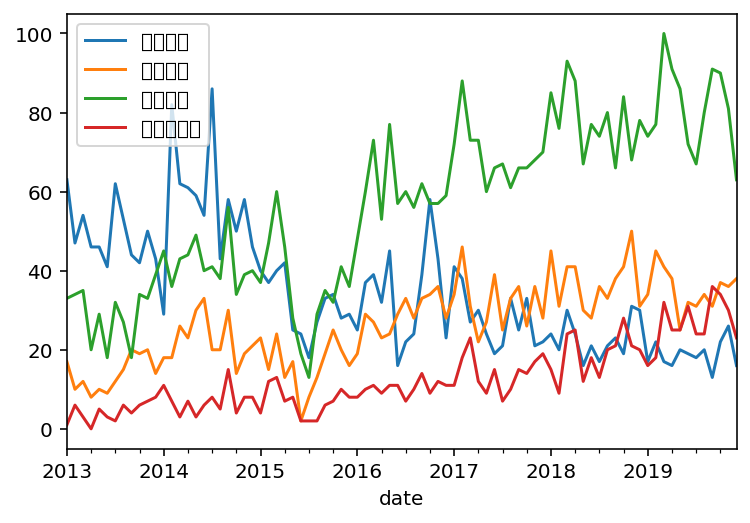

In [ ]:
### 대략적 그림 그리기
plt.figure(figsize=(12, 3))
interest_over_time_df.plot()

# **출입국 데이터 크롤링**


*  관련 국가의 한국방문 관광객수를 크롤링함

In [ ]:
def get_request_url(url):
    req = urllib.request.Request(url)
    try:
        response = urllib.request.urlopen(req)
#         print('Success: ' + str(datetime.datetime.now()))
        return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return None

In [ ]:
def getNatVisitor(yyyymm,nat_cd,ed_cd):
    access_key= '%2F6qJF976MsrShUlma86PLp0i2IJhfeVL1ttB%2FO%2BxAC%2Bpz1A%2BQYmVBreUXeKx%2F9SPsrXw8EOXSz1AQz1qrib5zw%3D%3D'
    end_point = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
    end_point += '?_type=json'   
    end_point += '&YM='+ yyyymm
    end_point += '&NAT_CD=' + nat_cd
    end_point += '&ED_CD' + ed_cd
    end_point += '&serviceKey=' + access_key
    retData = get_request_url(end_point)
    if retData == None:
        return None
    else:
        return json.loads(retData)

In [ ]:
nations = dict(한국=100, 아프가니스탄=101, 바레인=104, 방글라데시=105, 부탄=106, 브루나이=107, 미얀마=108, 영령인도양섬=109
               , 캄보디아=110, 스리랑카=111, 중국=112, 대만=113 ,키프로스=114 ,북한=118 ,홍콩=120 ,홍콩난민=121 ,인도=124, 인도네시아=125
               , 이란=126, 이라크=127, 이스라엘=128 ,일본=130 ,요르단=131 ,카자흐스탄=133 ,키르기스스탄=134 ,쿠웨이트=135 ,라오스=138
               , 레바논=139, 마카오=142, 말레이시아=143, 몰디브=144, 몽골=145, 마요트=146, 네팔=148, 오만=150, 파키스탄=153
               , 팔레스타인=154, 필리핀=155, 티모르=156, 카타르=159, 사우디아라비아=162, 시킴왕국=163, 싱가포르=164, 시리아=165
               , 타지키스탄=169, 태국=170, 터키=171, 투르크메니스탄=172, 아랍에미리트연합=180, 우즈베키스탄=181, 베트남=185
               , 예멘공화국=191, 예멘인민민주공화국=192, 앵귈라=200 ,앤티가바부다=201 ,아르헨티나=202 ,아루바=203 ,바하마=205
               , 바베이도스=206, 벨리즈=207 ,볼리비아=208 ,브라질=209 ,버뮤다=210 ,부베트=211 ,케이맨제도=212 ,캐나다=213, 칠레=214
               , 콜롬비아=215, 코스타리카=216, 쿠바=217, 도미니카연방=220, 도미니카공화국=221, 이스터제도=223, 에콰도르=224, 엘살바도르=225
               , 포클랜드=226 ,불령가이아나=227 ,그레나다=229 ,과들루프=230 ,과테말라=231 ,가이아나=232 ,아이티=235 ,온두라스=236
               , 자메이카=240, 마르티니크=247, 멕시코=248 ,몬서래트=249 ,네덜란드령앤틸리스=251, 니카라과=252, 파나마=255, 파라과이=256
               , 페루=257, 푸에르토리코=258, 남조지아남샌드위치군도=260, 상피에르미클롱=261, 세인트크리스토퍼네비스=262
               , 세인트루시아=263, 세인트빈센트그레나딘=264, 수리남=265 ,트리니다드토바고=268, 터크스케이커스=269, 우루과이=274
               , 미국=275, 미국인근섬=276, 베네수엘라=280, 미령버진아일랜드=281, 영령버진아일랜드=282, 알바니아=301, 안도라=302
               , 오스트리아=303, 아르메니아=304, 아제르바이잔=305, 벨기에=306, 불가리아=307, 벨로루시=308, 보스니아헤르체고비나=309
               , 체코=310, 페로섬=311, 에스토니아=312, 덴마크=313, 영국보호민=314, 영국속국민=315, 영국=316, 영국속령지시민=317
               , 영국외지민=318, 영국외지시민=319, 핀란드=320, 프랑스=321, 그루지야=323, 독일=324, 동독=325, 그리스=326, 지브롤터=327
               , 그린란드=328, 헝가리=329, 아이슬란드=333, 아일랜드=334, 이탈리아=335, 코소보=337, 라트비아=339, 리히텐슈타인=340
               , 룩셈부르크=341, 리투아니아=342, 마케도니아=343, 몰타=344, 모나코=345, 몰도바=346, 몬테네그로=347, 네덜란드=350
               , 노르웨이=352, 폴란드=360, 포르투갈=361, 루마니아=365, 러시아연방=366, 세르비아=367, 슬로바크=368, 슬로베니아=370
               , 산마리노=371, 스페인=372, 스웨덴=373, 스위스=374, 스발바르=375, 우크라이나=378, 독립국가연합=380, 바티칸=390
               , 크로아티아=391, 유고슬라비아=395, 세르비아앤몬테네그로=396, 오스트레일리아=404, 캐롤라인군도=411, 쿡아일랜드=412
               , 크리스마스=413, 코코스=414, 피지=418, 불령폴리네시아=419, 불령남태평양섬=420, 괌=423, 허드맥도날드=425, 키리바시=429
               , 북마리아나군도=434, 미크로네시아=435, 마라아나군도=436, 마샬군도=437, 미드웨이=438, 나우루=441, 뉴칼레도니아=443
               , 뉴질랜드=446, 니우에=447, 노폴크=448, 팔라우=451, 파푸아뉴기니=452, 핏캐른=454, 사모아=461, 미령사모아=462
               , 솔로몬군도=463, 호주령솔로몬군도=464, 통가=473, 토켈라우=474, 투발루=475, 비누아투=485, 웨이크아일랜드=490
               , 월리스푸투나=491, 알제리=502, 앙골라=503, 보츠와나=506, 부룬디=507, 카메룬=510, 카나리아군도=511, 카보베르데=512
               , 중앙아프리카공화국=513, 차드=514, 코모로=515, 콩고=516, 콩고민주공화국=517, 베냉=520, 지부티=521, 이집트=525
               , 적도기니=526, 에티오피아=527, 에리트레아=528, 가봉=530, 감비아=531, 가나=532, 기니=533, 기니비사우=534
               , 코트디부아르=537, 케냐=540, 레소토=542, 라이베리아=543, 리비아=544, 마다가스카르=550, 말라위=551, 말리=552
               , 모리타니=553, 모리셔스=554, 모로코=555, 모잠비크=556, 나미비아=560, 니제르=561, 나이지리아=562, 레위니옹=564
               , 짐바브웨=565, 르완다=566, 상투메프린시페=571, 세네갈=572, 세이셸=573, 시에라리온=574, 소말리아=575, 남아프리카공화국=576
               , 세인트헬레나=577, 수단=578, 스와질란드=579, 남수단공화국=580, 탄자니아=583, 토고=584, 튀니지=585, 우간다=588
               , 부르키나파소=589, 서사하라=591, 자이르=594, 잠비아=595, 남극대륙=620, 공해=666, 국제연합=900, 승무원=998, 교포=999)

In [ ]:
nations2=[nations['대만']]
nations2

[113]

In [ ]:
for n in nations2:
    nation_code = str(n)
    ed_cd = "E"
    #nStartYear = 2005
    #nEndYear = 2020
    nStartYear = 2013
    nEndYear = 2019
    jsonResult = []
    for year in range(nStartYear, nEndYear+1):
        for month in range(1, 13):
            yyyymm = "{0}{1:0>2}".format(str(year), str(month))
            retJson = getNatVisitor(yyyymm, nation_code, ed_cd)
            jsonData = retJson['response']['body']['items']['item']
            name = jsonData['natKorNm'].replace(' ','')
            national_code = jsonData['natCd']
            num_Visitors = jsonData['num']
            jsonResult.append({'nation' : name, 'nation_code': national_code, 'num_visitors' : num_Visitors, 'yyyymm': yyyymm})
    jsonResult
    fname = '{0}({1})_해외방문객정보_{2}_{3}'.format(name, nation_code, nStartYear, nEndYear)
    with open(fname,'w', encoding='utf8') as f:
        retJson = json.dumps(jsonResult,indent=4, sort_keys=True, ensure_ascii=False)
        f.write(retJson)

# **데이터 변환**

#### 저장된 인바운드관광객수를 로드(현재 visnum_TW)

In [ ]:
from pandas import json_normalize
visnum_TW = pd.read_json('/content/drive/MyDrive/Colab Notebooks/대만(113)_해외방문객정보_2013_2019') # , orient ='index'
otime_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/otime_df.xlsx', sheet_name='sheet1')
print(visnum_TW) # 출입국 데이터중 인바운드 대만 관광객수
print(otime_df)  # 구글 SVI지수
print(type(visnum_TW)) # visnum_TW의 변수타입

   nation  nation_code  num_visitors  yyyymm
0      대만          113         45171  201301
1      대만          113         45437  201302
2      대만          113         42102  201303
3      대만          113         35107  201304
4      대만          113         41361  201305
..    ...          ...           ...     ...
79     대만          113        109273  201908
80     대만          113        102758  201909
81     대만          113        127944  201910
82     대만          113        102241  201911
83     대만          113         90379  201912

[84 rows x 4 columns]
    Unnamed: 0       date  韓國觀光  韓國飯店  韓國機場  韓國免稅店
0            0 2013-01-01    63    17    33      1
1            1 2013-02-01    47    10    34      6
2            2 2013-03-01    54    12    35      3
3            3 2013-04-01    46     8    20      0
4            4 2013-05-01    46    10    29      5
..         ...        ...   ...   ...   ...    ...
79          79 2019-08-01    20    34    80     24
80          80 2019-09-01    

In [ ]:
print(otime_df)  # 구글 SVI지수

    Unnamed: 0       date  韓國觀光  韓國飯店  韓國機場  韓國免稅店
0            0 2013-01-01    63    17    33      1
1            1 2013-02-01    47    10    34      6
2            2 2013-03-01    54    12    35      3
3            3 2013-04-01    46     8    20      0
4            4 2013-05-01    46    10    29      5
..         ...        ...   ...   ...   ...    ...
79          79 2019-08-01    20    34    80     24
80          80 2019-09-01    13    31    91     36
81          81 2019-10-01    22    37    90     34
82          82 2019-11-01    26    36    81     30
83          83 2019-12-01    16    38    63     23

[84 rows x 6 columns]


In [ ]:
visnum_TW['date_merge']=pd.date_range(start='2013-01-01', end='2019-12-31', freq='M') # visnum_TW에서 2013년 1월부터 2020년 1월까지 월별로 날짜를 만들고 이를 date_merge에 저장
otime_df['date_merge']=pd.date_range(start='2013-01-01', end='2019-12-31', freq='M')  # otime_df에서 2013년 1월부터 2020년 1월까지 월별로 날짜를 만들고 이를 date_merge에 저장
print(visnum_TW)
print(otime_df)

   nation  nation_code  num_visitors  yyyymm date_merge
0      대만          113         45171  201301 2013-01-31
1      대만          113         45437  201302 2013-02-28
2      대만          113         42102  201303 2013-03-31
3      대만          113         35107  201304 2013-04-30
4      대만          113         41361  201305 2013-05-31
..    ...          ...           ...     ...        ...
79     대만          113        109273  201908 2019-08-31
80     대만          113        102758  201909 2019-09-30
81     대만          113        127944  201910 2019-10-31
82     대만          113        102241  201911 2019-11-30
83     대만          113         90379  201912 2019-12-31

[84 rows x 5 columns]
    Unnamed: 0       date  韓國觀光  韓國飯店  韓國機場  韓國免稅店 date_merge
0            0 2013-01-01    63    17    33      1 2013-01-31
1            1 2013-02-01    47    10    34      6 2013-02-28
2            2 2013-03-01    54    12    35      3 2013-03-31
3            3 2013-04-01    46     8    20      0 2013-0

In [ ]:
merge_df_SVI_num = pd.concat([visnum_TW, otime_df], axis=1)
merge_df_SVI_num

,nation,nation_code,num_visitors,yyyymm,date_merge,Unnamed: 0,date,韓國觀光,韓國飯店,韓國機場,韓國免稅店,date_merge
0,대만,113,45171,201301,2013-01-31,0,2013-01-01,63,17,33,1,2013-01-31
1,대만,113,45437,201302,2013-02-28,1,2013-02-01,47,10,34,6,2013-02-28
2,대만,113,42102,201303,2013-03-31,2,2013-03-01,54,12,35,3,2013-03-31
3,대만,113,35107,201304,2013-04-30,3,2013-04-01,46,8,20,0,2013-04-30
4,대만,113,41361,201305,2013-05-31,4,2013-05-01,46,10,29,5,2013-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...
79,대만,113,109273,201908,2019-08-31,79,2019-08-01,20,34,80,24,2019-08-31
80,대만,113,102758,201909,2019-09-30,80,2019-09-01,13,31,91,36,2019-09-30
81,대만,113,127944,201910,2019-10-31,81,2019-10-01,22,37,90,34,2019-10-31
82,대만,113,102241,201911,2019-11-30,82,2019-11-01,26,36,81,30,2019-11-30


In [ ]:
merge_df_SVI_num.to_excel('/content/drive/MyDrive/Colab Notebooks/merge_df_SVI_num.xlsx', sheet_name='sheet1')

#### merge를 통해 특정 컬럼의 값을 기준으로 통합

In [ ]:
merge_df = pd.concat([merge_df_SVI_num], axis=1)
merge_df

,nation,nation_code,num_visitors,yyyymm,date_merge,Unnamed: 0,date,韓國觀光,韓國飯店,韓國機場,韓國免稅店,date_merge
0,대만,113,45171,201301,2013-01-31,0,2013-01-01,63,17,33,1,2013-01-31
1,대만,113,45437,201302,2013-02-28,1,2013-02-01,47,10,34,6,2013-02-28
2,대만,113,42102,201303,2013-03-31,2,2013-03-01,54,12,35,3,2013-03-31
3,대만,113,35107,201304,2013-04-30,3,2013-04-01,46,8,20,0,2013-04-30
4,대만,113,41361,201305,2013-05-31,4,2013-05-01,46,10,29,5,2013-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...
79,대만,113,109273,201908,2019-08-31,79,2019-08-01,20,34,80,24,2019-08-31
80,대만,113,102758,201909,2019-09-30,80,2019-09-01,13,31,91,36,2019-09-30
81,대만,113,127944,201910,2019-10-31,81,2019-10-01,22,37,90,34,2019-10-31
82,대만,113,102241,201911,2019-11-30,82,2019-11-01,26,36,81,30,2019-11-30


#### 파이썬의 데이터를 R로 변환

In [ ]:
%R -i merge_df
print(merge_df.head())

  nation  nation_code  num_visitors  yyyymm date_merge  Unnamed: 0       date  \
0     대만          113         45171  201301 2013-01-31           0 2013-01-01   
1     대만          113         45437  201302 2013-02-28           1 2013-02-01   
2     대만          113         42102  201303 2013-03-31           2 2013-03-01   
3     대만          113         35107  201304 2013-04-30           3 2013-04-01   
4     대만          113         41361  201305 2013-05-31           4 2013-05-01   

   韓國觀光  韓國飯店  韓國機場  韓國免稅店 date_merge  
0    63    17    33      1 2013-01-31  
1    47    10    34      6 2013-02-28  
2    54    12    35      3 2013-03-31  
3    46     8    20      0 2013-04-30  
4    46    10    29      5 2013-05-31  


In [ ]:
%%R
print(head(merge_df))
print(tail(merge_df))
print(names(merge_df))

  nation nation_code num_visitors yyyymm date_merge Unnamed: 0       date
0   대만         113        45171 201301 2013-01-31          0 2013-01-01
1   대만         113        45437 201302 2013-02-28          1 2013-02-01
2   대만         113        42102 201303 2013-03-31          2 2013-03-01
3   대만         113        35107 201304 2013-04-30          3 2013-04-01
4   대만         113        41361 201305 2013-05-31          4 2013-05-01
5   대만         113        53808 201306 2013-06-30          5 2013-06-01
  韓國觀光 韓國飯店 韓國機場 韓國免稅店
0       63       17       33          1
1       47       10       34          6
2       54       12       35          3
3       46        8       20          0
4       46       10       29          5
5       41        9       18          3
   nation nation_code num_visitors yyyymm date_merge Unnamed: 0       date
78   대만         113       113587 201907 2019-07-31         78 2019-07-01
79   대만         113       109273 201908 2019-08-31         79 2019-08-01
80   대만   

In [ ]:
merge_df.to_excel('/content/drive/MyDrive/Colab Notebooks//merge_df_SVI_num.xlsx')

# **상관분석(R)**

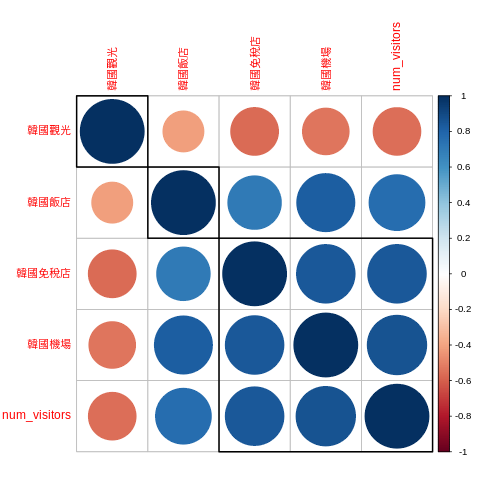

In [ ]:
%%R
#### 상관관계 시각화
library(corrplot)
Dataset <- subset(merge_df,select=c(韓國免稅店,韓國飯店,韓國機場,韓國觀光,num_visitors))
M <- cor(Dataset)
corrplot(M, order="hclust", addrect=3)

In [ ]:
%%R
#### 상관관계 숫자표시
library(Hmisc)
res2 <- rcorr(as.matrix(Dataset))
print(res2$r, digits=3)
print(res2$P, digits=3)
#한국여행이 가장 상관관계가 높음

             韓國免稅店 韓國飯店 韓國機場 韓國觀光 num_visitors
韓國免稅店        1.000    0.703    0.842   -0.561        0.843
韓國飯店          0.703    1.000    0.828   -0.413        0.765
韓國機場          0.842    0.828    1.000   -0.535        0.866
韓國觀光         -0.561   -0.413   -0.535    1.000       -0.559
num_visitors      0.843    0.765    0.866   -0.559        1.000
             韓國免稅店 韓國飯店 韓國機場 韓國觀光 num_visitors
韓國免稅店           NA 8.62e-14 0.00e+00 2.76e-08     0.00e+00
韓國飯店       8.62e-14       NA 0.00e+00 9.57e-05     0.00e+00
韓國機場       0.00e+00 0.00e+00       NA 1.61e-07     0.00e+00
韓國觀光       2.76e-08 9.57e-05 1.61e-07       NA     3.34e-08
num_visitors   0.00e+00 0.00e+00 0.00e+00 3.34e-08           NA


# **회귀분석(R)**

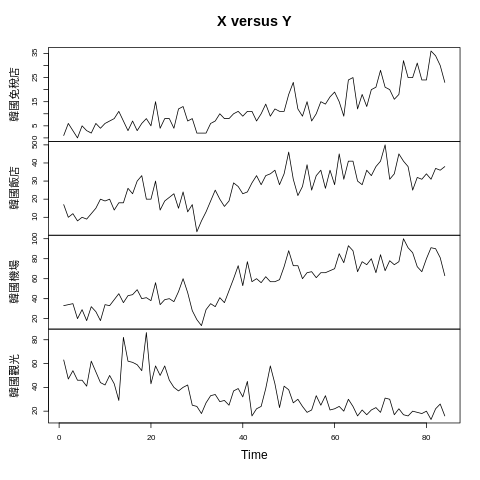

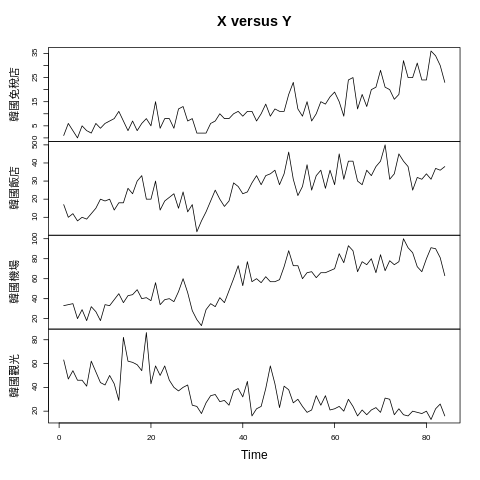

In [ ]:
%%R
x = ts(subset(Dataset,select=c(韓國免稅店,韓國飯店,韓國機場,韓國觀光)))
# x_old = ts(subset(Dataset,select=c(Close,POILWTIUSDM)))
x_SVI = ts(subset(Dataset,select=c(韓國免稅店,韓國飯店,韓國機場,韓國觀光)))
y = ts(subset(Dataset,select=c(num_visitors)))
plot(x,y, pch=20,main = "X versus Y")
# plot(x_old,y, pch=20,main = "X versus Y")
plot(x_SVI,y, pch=20,main = "X versus Y")

In [ ]:
# %%R
# #library(astsa)
# reg_old=lm(y~Close+POILWTIUSDM,data=Dataset)
# print(summary(reg_old))
# acf2(residuals(reg_old))


Call:
lm(formula = y ~ 韓國免稅店 + 韓國飯店 + 韓國機場 + 
    韓國觀光, data = Dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-24999.6  -6820.6   -419.5   8612.2  23946.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26487.45    6154.21   4.304 4.77e-05 ***
韓國免稅店   1010.59     270.97   3.730 0.000359 ***
韓國飯店      357.82     208.79   1.714 0.090483 .  
韓國機場      449.98     133.05   3.382 0.001121 ** 
韓國觀光     -130.13      92.95  -1.400 0.165423    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10890 on 79 degrees of freedom
Multiple R-squared:  0.8059,	Adjusted R-squared:  0.796 
F-statistic: 81.98 on 4 and 79 DF,  p-value: < 2.2e-16

     [,1] [,2] [,3]  [,4]  [,5]  [,6]  [,7]  [,8] [,9] [,10] [,11] [,12] [,13]
ACF  0.28 0.18 0.10 -0.03 -0.20 -0.03 -0.20 -0.12 0.06  0.13  0.15  0.16  0.08
PACF 0.28 0.11 0.03 -0.09 -0.21  0.09 -0.17  0.00 0.13  0.10  0.11 -0.03 -0.02
     [,14] [,15] [,16] [,17] [,18

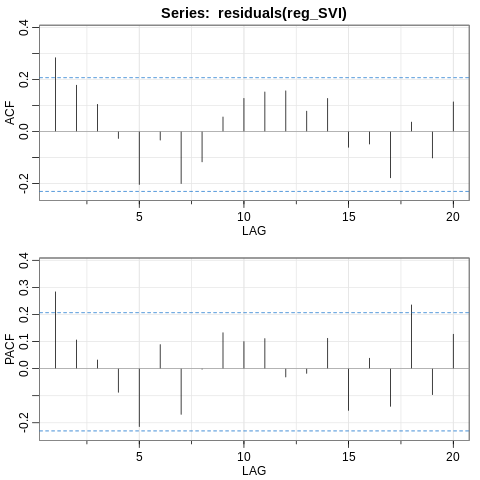

In [ ]:
%%R
#library(astsa)
reg_SVI=lm(y~韓國免稅店+韓國飯店+韓國機場+韓國觀光,data=Dataset)
print(summary(reg_SVI))
acf2(residuals(reg_SVI))


Call:
lm(formula = y ~ 韓國免稅店 + 韓國飯店 + 韓國機場 + 
    韓國觀光, data = Dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-24999.6  -6820.6   -419.5   8612.2  23946.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26487.45    6154.21   4.304 4.77e-05 ***
韓國免稅店   1010.59     270.97   3.730 0.000359 ***
韓國飯店      357.82     208.79   1.714 0.090483 .  
韓國機場      449.98     133.05   3.382 0.001121 ** 
韓國觀光     -130.13      92.95  -1.400 0.165423    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10890 on 79 degrees of freedom
Multiple R-squared:  0.8059,	Adjusted R-squared:  0.796 
F-statistic: 81.98 on 4 and 79 DF,  p-value: < 2.2e-16

     [,1] [,2] [,3]  [,4]  [,5]  [,6]  [,7]  [,8] [,9] [,10] [,11] [,12] [,13]
ACF  0.28 0.18 0.10 -0.03 -0.20 -0.03 -0.20 -0.12 0.06  0.13  0.15  0.16  0.08
PACF 0.28 0.11 0.03 -0.09 -0.21  0.09 -0.17  0.00 0.13  0.10  0.11 -0.03 -0.02
     [,14] [,15] [,16] [,17] [,18

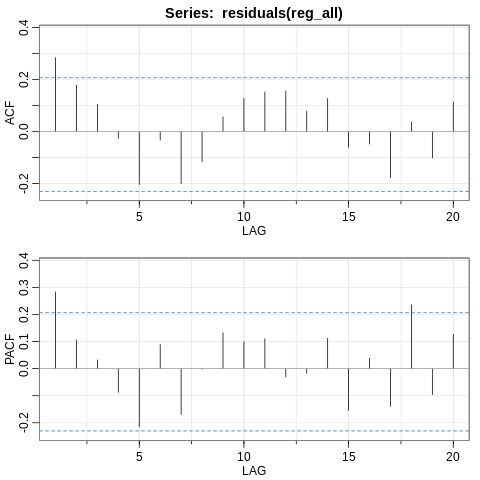

In [ ]:
%%R
#library(astsa)
reg_all=lm(y~韓國免稅店+韓國飯店+韓國機場+韓國觀光,data=Dataset)
print(summary(reg_all))
acf2(residuals(reg_all))

In [ ]:
%%R
stargazer(reg_SVI,reg_all, type = "text", report = "vct*", star.cutoffs = c(0.05, 0.01, 0.001),
          column.labels = c("mod.SVI","mod.all"), 
          single.row = TRUE)


                                   Dependent variable:      
                              ------------------------------
                                            y               
                                  mod.SVI        mod.all    
                                    (1)            (2)      
------------------------------------------------------------
韓國免稅店                            1,010.588      1,010.588   
                               t = 3.730***    t = 3.730*** 
韓國飯店                              357.824        357.824    
                                 t = 1.714      t = 1.714   
韓國機場                              449.979        449.979    
                                t = 3.382**    t = 3.382**  
韓國觀光                             -130.131        -130.131   
                                t = -1.400      t = -1.400  
Constant                        26,487.450      26,487.450  
                               t = 4.304***    t = 4.304*** 
-----------------------

# **구글 트렌드에 있는 데이터로는 다른 분석 과제를 수행하는데 무리가 있다고 판단, 관광지식정보시스템에 있는 관광객 실태 조사 설문지를 활용하여 2013 ~ 2019 년의 외래 관광객의 모든 데이터 중 대만 관광객만 추리고, 데이터량과 가장 최신의 자료인 2019년도의 설문지로 분석 진행**


**https://know.tour.go.kr/stat/fResearchSumDis19Re.do**

**사용한 분석과 각 변수**

 - one way anova -  방한 목적에 따라 방한 횟수
 - 다중회귀분석 - 각 관광지, 총 방문객 수
교차분석 : 방한목적 - 성별 (질적, 질적)
상관분석 : 동반자수 - 1인 평균 지출 경비 단체여행 총액(양적, 양적)
 - 다중회귀분석 : 대만관광객의 총 방문객 수 - 쇼핑, 관광지매력도, 숙박비, 
 - t-test : 성별 - 관광만족도

## 설문지 데이터 로드(github를 활용)

In [ ]:
%%R
### 데이터 로드
# if (!require(readxl)) {install.packages("readxl")
#   library(readxl)}
# url <- "https://github.com/HakJun-Song/class/blob/master/incheon0427.xlsx?raw=true"
# destfile <- "incheon0427.xlsx"
# curl::curl_download(url, destfile)
# incheon0427 <- read_excel(destfile)

tw_data <- read.xlsx("https://github.com/Geon27/3-2-googlecolab/raw/main/2019_Taiwan.xlsx")

#### 데이터 변환

(tw_data의 자료 확인)

In [ ]:
%%R
str(tw_data)

'data.frame':	1222 obs. of  439 variables:
 $ Q1            : num  1 5 1 1 1 1 10 2 10 1 ...
 $ Q2A1          : num  2 3 3 4 3 1 2 1 2 2 ...
 $ Q2A2          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Q2A3          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Q2A4          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Q2A5          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Q2_1          : num  10 2 3 4 3 NA 4 NA 2 4 ...
 $ Q3A1          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Q3A2          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Q3A3          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Q3A4          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Q3B1          : num  98 98 98 98 98 98 98 98 98 98 ...
 $ Q3B2          : num  98 98 98 98 98 98 98 98 98 98 ...
 $ Q4            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Q4_1A1        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Q4_1A2        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Q4_1A3        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Q4_1A4       

In [ ]:
%%R
head(tw_data)

  Q1 Q2A1 Q2A2 Q2A3 Q2A4 Q2A5 Q2_1 Q3A1 Q3A2 Q3A3 Q3A4 Q3B1 Q3B2 Q4 Q4_1A1
1  1    2   NA   NA   NA   NA   10    1   NA   NA   NA   98   98  1     NA
2  5    3   NA   NA   NA   NA    2    1   NA   NA   NA   98   98  1     NA
3  1    3   NA   NA   NA   NA    3    1   NA   NA   NA   98   98  1     NA
4  1    4   NA   NA   NA   NA    4    1   NA   NA   NA   98   98  1     NA
5  1    3   NA   NA   NA   NA    3    1   NA   NA   NA   98   98  1     NA
6  1    1   NA   NA   NA   NA   NA    1   NA   NA   NA   98   98  1     NA
  Q4_1A2 Q4_1A3 Q4_1A4 Q4_1A5 Q4_1A6 Q4_1A7 Q4_1A8 Q4_1A9 Q4_1A10 Q5_1 Q5_2A1
1     NA     NA     NA     NA     NA     NA     NA     NA      NA    1     10
2     NA     NA     NA     NA     NA     NA     NA     NA      NA    1      2
3     NA     NA     NA     NA     NA     NA     NA     NA      NA    1      1
4     NA     NA     NA     NA     NA     NA     NA     NA      NA    3     NA
5     NA     NA     NA     NA     NA     NA     NA     NA      NA    1      1
6     N

In [ ]:
%%R
dim(tw_data)

[1] 1222  439


In [ ]:
%%R
names(tw_data)

  [1] "Q1"             "Q2A1"           "Q2A2"           "Q2A3"          
  [5] "Q2A4"           "Q2A5"           "Q2_1"           "Q3A1"          
  [9] "Q3A2"           "Q3A3"           "Q3A4"           "Q3B1"          
 [13] "Q3B2"           "Q4"             "Q4_1A1"         "Q4_1A2"        
 [17] "Q4_1A3"         "Q4_1A4"         "Q4_1A5"         "Q4_1A6"        
 [21] "Q4_1A7"         "Q4_1A8"         "Q4_1A9"         "Q4_1A10"       
 [25] "Q5_1"           "Q5_2A1"         "Q5_2A2"         "Q5_2A3"        
 [29] "Q6_1A1"         "Q6_1A2"         "Q6_1A3"         "Q6_2A1"        
 [33] "Q6_2A2"         "Q6_2A3"         "Q6_3A1"         "Q6_3A2"        
 [37] "Q6_3A3"         "Q7"             "Q8A1"           "Q8A2"          
 [41] "Q8A3"           "Q9_1A1"         "Q9_1A2"         "Q9_1A3"        
 [45] "Q9_1A4"         "Q9_1A5"         "Q9_1A6"         "Q9_1A7"        
 [49] "Q9_1A8"         "Q9_1A9"         "Q9_1A10"        "Q9_1A11"       
 [53] "Q9_1A12"        "Q9_1A13"      

In [ ]:
%%R
tw_data_ex = tw_data
head(tw_data_ex)

  Q1 Q2A1 Q2A2 Q2A3 Q2A4 Q2A5 Q2_1 Q3A1 Q3A2 Q3A3 Q3A4 Q3B1 Q3B2 Q4 Q4_1A1
1  1    2   NA   NA   NA   NA   10    1   NA   NA   NA   98   98  1     NA
2  5    3   NA   NA   NA   NA    2    1   NA   NA   NA   98   98  1     NA
3  1    3   NA   NA   NA   NA    3    1   NA   NA   NA   98   98  1     NA
4  1    4   NA   NA   NA   NA    4    1   NA   NA   NA   98   98  1     NA
5  1    3   NA   NA   NA   NA    3    1   NA   NA   NA   98   98  1     NA
6  1    1   NA   NA   NA   NA   NA    1   NA   NA   NA   98   98  1     NA
  Q4_1A2 Q4_1A3 Q4_1A4 Q4_1A5 Q4_1A6 Q4_1A7 Q4_1A8 Q4_1A9 Q4_1A10 Q5_1 Q5_2A1
1     NA     NA     NA     NA     NA     NA     NA     NA      NA    1     10
2     NA     NA     NA     NA     NA     NA     NA     NA      NA    1      2
3     NA     NA     NA     NA     NA     NA     NA     NA      NA    1      1
4     NA     NA     NA     NA     NA     NA     NA     NA      NA    3     NA
5     NA     NA     NA     NA     NA     NA     NA     NA      NA    1      1
6     N

# 기술통계

In [ ]:
# %%R
# tw_data_ex$visit_bi <- factor(as.numeric(tw_data_ex$visit_bi), labels=c('방문예정','방문비예정'))
# #table(Dataset$gender)
# frq(tw_data_ex$visit_bi, out = "v")

R[write to console]: Error in factor(as.numeric(tw_data_ex$visit_bi), labels = c("방문예정",  : 
  invalid 'labels'; length 2 should be 1 or 0

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
R[write to console]: 
 
R[write to console]:  there is no package called ‘DiagrammeRsvg’

R[write to console]: 2: 
R[write to console]: In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
R[write to console]: 
 
R[write to console]:  there is no package called ‘DiagrammeR’

R[write to console]: 3: 
R[write to console]: In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
R[write to console]: 
 
R[write to console]:  there is no package called ‘pacman’

R[write to console]: 4: 
R[write to console]: In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return 


Error in factor(as.numeric(tw_data_ex$visit_bi), labels = c("방문예정",  : 
  invalid 'labels'; length 2 should be 1 or 0


RInterpreterError: ignored

## 추리통계

### 회귀분석: 변수(들)이 하나의 종속변수에 미치는 영향력을 보기 위한 분석, 독립변수와 종속변수 모두 양적변수

#### 단순회귀분석:독립변수(), 종속변수(총 방문객 수)

In [ ]:
%%R
mod1=lm(CQ10_6A1 ~ D_Q5_1, data=tw_data)
summary(mod1)


Call:
lm(formula = CQ10_6A1 ~ D_Q5_1, data = tw_data)

Residuals:
   Min     1Q Median     3Q    Max 
-3.840 -0.840 -0.202 -0.202  9.798 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.88301    0.10192  38.100  < 2e-16 ***
D_Q5_1       0.31899    0.06909   4.617 4.31e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.704 on 1220 degrees of freedom
Multiple R-squared:  0.01717,	Adjusted R-squared:  0.01637 
F-statistic: 21.32 on 1 and 1220 DF,  p-value: 4.305e-06



#### 다중회귀분석: 독립변수(관광지 매력도(Q15_2A6), 방한목적(Q5_1), 선택 고려요인Q5_2A1,Q5_2A2,Q5_2A3), 종속변수(총 숙박기간, CQ10_6A1)

In [ ]:
%%R
mod2=lm(CQ10_6A1 ~ Q15_2A6+Q5_1+Q5_2A1+Q5_2A2+Q5_2A3, data=tw_data)
summary(mod2)


Call:
lm(formula = CQ10_6A1 ~ Q15_2A6 + Q5_1 + Q5_2A1 + Q5_2A2 + Q5_2A3, 
    data = tw_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9805 -0.3389 -0.2332 -0.0537 10.0103 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.77854    0.36903   7.529 1.16e-13 ***
Q15_2A6      0.10256    0.05570   1.841 0.065872 .  
Q5_1         0.93912    0.25142   3.735 0.000198 ***
Q5_2A1       0.01292    0.01522   0.849 0.396116    
Q5_2A2      -0.01109    0.01566  -0.708 0.479004    
Q5_2A3       0.01154    0.01259   0.916 0.359638    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.397 on 977 degrees of freedom
  (239 observations deleted due to missingness)
Multiple R-squared:  0.01897,	Adjusted R-squared:  0.01395 
F-statistic: 3.779 on 5 and 977 DF,  p-value: 0.002146



In [ ]:
%%R
stargazer(mod2, type = "text", report = "vct*", star.cutoffs = c(0.05, 0.01, 0.001),
          column.labels = c("coef"), 
          single.row = TRUE)


                         Dependent variable:     
                    -----------------------------
                              CQ10_6A1           
                                coef             
-------------------------------------------------
Q15_2A6                         0.103            
                              t = 1.841          
Q5_1                            0.939            
                            t = 3.735***         
Q5_2A1                          0.013            
                              t = 0.849          
Q5_2A2                         -0.011            
                             t = -0.708          
Q5_2A3                          0.012            
                              t = 0.916          
Constant                        2.779            
                            t = 7.529***         
-------------------------------------------------
Observations                     983             
R2                              0.019            

In [ ]:
%%R
report(mod2)

We fitted a linear model (estimated using OLS) to predict CQ10_6A1 with Q15_2A6, Q5_1, Q5_2A1, Q5_2A2 and Q5_2A3 (formula: CQ10_6A1 ~ Q15_2A6 + Q5_1 + Q5_2A1 + Q5_2A2 + Q5_2A3). The model explains a statistically significant and very weak proportion of variance (R2 = 0.02, F(5, 977) = 3.78, p = 0.002, adj. R2 = 0.01). The model's intercept, corresponding to Q15_2A6 = 0, Q5_1 = 0, Q5_2A1 = 0, Q5_2A2 = 0 and Q5_2A3 = 0, is at 2.78 (95% CI [2.05, 3.50], t(977) = 7.53, p < .001). Within this model:

  - The effect of Q15 2A6 is statistically non-significant and positive (beta = 0.10, 95% CI [-6.74e-03, 0.21], t(977) = 1.84, p = 0.066; Std. beta = 0.06, 95% CI [-3.84e-03, 0.12])
  - The effect of Q5 1 is statistically significant and positive (beta = 0.94, 95% CI [0.45, 1.43], t(977) = 3.74, p < .001; Std. beta = 0.12, 95% CI [0.06, 0.18])
  - The effect of Q5 2A1 is statistically non-significant and positive (beta = 0.01, 95% CI [-0.02, 0.04], t(977) = 0.85, p = 0.396; Std. beta = 0.03, 95

In [ ]:
%%R
equatiomatic::extract_eq(mod2, use_coefs = TRUE)

$$
\operatorname{\widehat{CQ10\_6A1}} = 2.78 + 0.1(\operatorname{Q15\_2A6}) + 0.94(\operatorname{Q5\_1}) + 0.01(\operatorname{Q5\_2A1}) - 0.01(\operatorname{Q5\_2A2}) + 0.01(\operatorname{Q5\_2A3})
$$


$$
\operatorname{\widehat{sup\_avg}} = 0.51 + 0.41(\operatorname{pos\_eco\_avg}) + 0.4(\operatorname{pos\_soc\_avg})
$$

#### 다중회귀분석: 독립변수(), 종속변수(총 방문객 수)

### 연관성분석: 변수A와 B가 얼마나 서로 관계가 있느냐?  

*   교차분석: 질적변수간의 관계
*   상관분석: 양적변수간의 관계

#### 교차분석  : 방한목적 - 성별
□ 질적변수(성별, 소득, 직업), 질적변수(성별, 소득, 직업): 성별 - 방한목적별

In [ ]:
%%R
# 교차분석 그래프 그리기와 통계분석
# 교차분석 ct1, ct2 변수할당
tw_data$ct1=tw_data$Q5_1; tw_data$ct2=tw_data$D_GEN
# 추리통계학으로 확인하기
CrossTable(tw_data$ct1, tw_data$ct2)
mytable<-xtabs( ~ ct1+ct2,data=tw_data)
chisq.test(mytable) 


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1222 

 
             | tw_data$ct2 
 tw_data$ct1 |         1 |         2 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |       311 |       713 |      1024 | 
             |     2.938 |     1.478 |           | 
             |     0.304 |     0.696 |     0.838 | 
             |     0.760 |     0.877 |           | 
             |     0.255 |     0.583 |           | 
-------------|-----------|-----------|-----------|
           2 |        10 |        36 |        46 | 
             |     1.891 |     0.951 |           | 
             |     0.217 |     0.783 |     0.038 | 
             |     0.024 |     0.044 |           | 
             |     0.008 |     0.029 |           | 
-------------|-----------|-----------|--

* ct1은 방한목적별(1:여가, 위락, 휴가, 2: 친구/친지 방문, 3: 사업/전문활동, 4: 교육, 5: 종교 및 순례)을, ct2는 성별(1:남자, 2:여자)를 얘기해 줌
* 전체적으로 남자는 311명, 여자는 713명로 여자가 많음
* 
* 
* 
* 
* 
* 

* chisq.test() 함수를 이용한 교차분석의 결과를 보면, p-value(유의확률)가 1.848e-10로 0.05보다 작아서 귀무가설을 기각하고 연구가설을 채택하여 성별과 방한 목적별의 변수와는 통계적으로 유의한 연관성이 있다고 할 수 있음
  - 귀무가설: 성별과 개발이전에 방한 목적별과는 통계적으로 유의한 연관성 없다(채택되려면 p-value가 0.05보다 커야 함)
  - 연구가설: 성별과 개발이전에 방한 목적별과는 통계적으로 유의한 연관성 있다(채택되려면 p-value가 0.05보다 작아야 함)

#### 상관분석  동반자수-1인평균지출경비(단체여행 총액)
□ 양적변수(연령, 체류기간, 만족도, 방한횟수), 양적변수(연령, 체류기간, 만족도): 동반자수-여행형태별 1인 평균 지출 경비총액

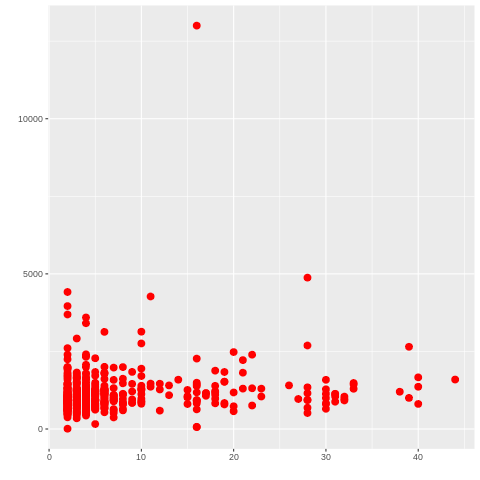

In [ ]:
%%R
# 상관분석 x1, x2 변수할당
tw_data$cor1=tw_data$Q2_1
tw_data$cor2=tw_data$G_Q14_1T
# 그래프로 이해하기
ggplot(tw_data, aes(x=cor1, y=cor2)) + 
  geom_point(size = 3, color = "red")+ # 포인트색 설정: red(빨강)
  xlab(' ') +             # x축이름 설정
  ylab(' ')               # y축이름 설정

In [ ]:
%%R
# 추리통계학으로 확인하기
cor_test=cor.test(tw_data$cor1, tw_data$cor2)
cor_test


	Pearson's product-moment correlation

data:  tw_data$cor1 and tw_data$cor2
t = 2.8229, df = 514, p-value = 0.004943
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03764183 0.20766385
sample estimates:
      cor 
0.1235595 



- Pearson 상관계수(r)는 0.554이고, 이에 대한 p-value는 0.004943로서 기준이 되는 0.05보다 작은 값임 → 귀무가설 기각  
- 이때 p-value가 기준값(critical value, criteria)보다 작아서(귀무가설 기각) 내재되어 있는 귀무가설(모집단에서 상관계수가 0이다, true correlation is equal to 0)을 기각하여 연구가설(모집단에서 상관계수는 0이 아니다, true correlation is not equal to 0)을 채택하게 되므로 두 변수(동반자수와 여행형태별 1인 평균 지출 경비)는 유의수준 0.05(95% 신뢰수준)에서 서로 상관관계()가 있다고 할 수 있음

In [ ]:
%%R
# Correlations
report(cor_test)
#report(res2)

Effect sizes were labelled following Funder's (2019) recommendations.

The Pearson's product-moment correlation between tw_data$cor1 and tw_data$cor2 is positive, statistically significant, and small (r = 0.12, 95% CI [0.04, 0.21], t(514) = 2.82, p = 0.005)

tw_data$cor1과 tw_data$cor2 사이의 Pearson의 곱-값 상관 관계는 양수이며 통계적으로 유의하며 작습니다(r = 0.12, 95% CI [0.04, 0.21, t(514) = 2.82, p = 0.005).

## 차이분석: 질적 그룹변수에 따른 양적변수의 차이에 대한 추리통계

### t-test: 질적 그룹변수의 카테고리가 2개인 경우 (성별 - 관광만족도)

In [ ]:
%%R
### t-test
# if (!require(lawstat)) {install.packages("lawstat")
#   library(lawstat)}
print(leveneTest(tw_data$CQ10_6A1, tw_data$D_GEN,                             # 형식: 양적변수, 질적변수
            location = "mean", correction.method = "zero.correction"))

Levene's Test for Homogeneity of Variance (center = median: "mean")
        Df F value Pr(>F)
group    1  0.8857 0.3468
      1220               


In [ ]:
%%R
print(t.test(tw_data$CQ10_6A1 ~ tw_data$D_GEN, var.equal = T))
# print(t.test(gender$sup_avg ~ analy_dataset$Q15_1, var.equal = F))


	Two Sample t-test

data:  tw_data$CQ10_6A1 by tw_data$D_GEN
t = -1.6651, df = 1220, p-value = 0.09615
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 -0.37752272  0.03089383
sample estimates:
mean in group 1 mean in group 2 
       4.180929        4.354244 



두 표본 t-검정

데이터: tw_data$CQ10_6A1, tw_data$D_GEN
t = -1.6651, df = 1220, p-값 = 0.09615
대립 가설: 그룹 1과 그룹 2 사이의 평균의 실제 차이가 0이 아닙니다.
95% 신뢰 구간:
-0.37752272 0.03089383
표본 추정치:
그룹 1의 평균, 그룹 2의 평균
4.180929 4.354244

In [ ]:
%%R
report(t.test(tw_data$CQ10_6A1 ~ tw_data$D_GEN, var.equal = TRUE))

Effect sizes were labelled following Cohen's (1988) recommendations.

The Two Sample t-test testing the difference of tw_data$CQ10_6A1 by tw_data$D_GEN (mean in group 1 = 4.18, mean in group 2 = 4.35) suggests that the effect is negative, statistically not significant, and very small (difference = -0.17, 95% CI [-0.38, 0.03], t(1220) = -1.67, p = 0.096; Cohen's d = -0.10, 95% CI [-0.22, 0.02])

효과 크기는 Cohen(1988)의 권고에 따라 라벨링되었다.

tw_data$CQ10_6A1의 차이를 tw_data$D_GEN으로 검정한 두 표본 t-검정 결과(1그룹 = 4.18, 그룹 2 = 4.35 평균)는 효과가 음수이고 통계적으로 유의하지 않으며 매우 작다는 것을 시사합니다(차이 = -0.17, 95% CI [-0.02, 0.02], -0.06; T's)

### One-way Anova: 질적 그룹변수의 카테고리가 3개 이상인 경우

one way anova: 방한 목적에 따라 방한 횟수에 차이가 있는지


In [ ]:
%%R
#방한 목적 질적변수화
tw_data$D_Q5_1 <- as.factor(tw_data$D_Q5_1)

In [ ]:
%%R
print(tapply(tw_data$D_Q5_1,tw_data$Q1,mean))
tapply(tw_data$D_Q5_1,tw_data$Q1,sd)

  1   2   3   4   5   6   7   8   9  10  11  12  15  16  18  19  20  21  30  40 
 NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA 
 50  70 100 
 NA  NA  NA 


R[write to console]: Error in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm) : 
  Calling var(x) on a factor x is defunct.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.

R[write to console]: In addition: 
R[write to console]: There were 23 warnings (use warnings() to see them)
R[write to console]: 




Error in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm) : 
  Calling var(x) on a factor x is defunct.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.


RInterpreterError: ignored

In [ ]:
%%R
# 등분산 확인하는 방법
bartlett.test(Q1 ~ D_Q5_1, data=tw_data) # q3: 연령


	Bartlett test of homogeneity of variances

data:  Q1 by D_Q5_1
Bartlett's K-squared = 1316.8, df = 4, p-value < 2.2e-16



In [ ]:
%%R
# 등분산 만족시
#incheon0427$q3=as.factor(incheon0427$q3)
round(tapply(tw_data$Q1,tw_data$D_Q5_1,mean),3)
round(tapply(tw_data$Q1,tw_data$D_Q5_1,sd),3)
anova<-aov(Q1 ~ D_Q5_1, data=tw_data)
print(summary(anova))

              Df Sum Sq Mean Sq F value Pr(>F)    
D_Q5_1         4   5849  1462.2   36.75 <2e-16 ***
Residuals   1217  48421    39.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
report(anova)

R[write to console]: For one-way between subjects designs, partial eta squared is equivalent to eta squared.
Returning eta squared.



The ANOVA (formula: Q1 ~ D_Q5_1) suggests that:

  - The main effect of D_Q5_1 is statistically significant and medium (F(4, 1217) = 36.75, p < .001; Eta2 = 0.11, 95% CI [0.08, 1.00])

Effect sizes were labelled following Field's (2013) recommendations.

분산 분석(공식: Q1 ~ D_Q5_1)은 다음을 나타냅니다.

- D_Q5_1의 주효과는 통계적으로 유의하고 중간값입니다(F(4, 1217) = 36.75, p <.001; Eta2 = 0.11, 95% CI [0.08, 1.00]).

효과 크기는 현장(2013) 권고사항에 따라 라벨링되었다.

In [ ]:
%%R
# 사후분석
print(TukeyHSD(anova))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Q1 ~ D_Q5_1, data = tw_data)

$D_Q5_1
          diff         lwr        upr     p adj
2-1  1.8231573  -0.7739682  4.4202827 0.3083260
3-1  6.3998481   4.8662197  7.9334765 0.0000000
4-1 -0.9029297  -8.6280036  6.8221442 0.9977505
5-1 15.1637370   5.2004061 25.1270678 0.0003314
3-2  4.5766908   1.6582790  7.4951026 0.0001919
4-2 -2.7260870 -10.8403878  5.3882139 0.8901056
5-2 13.3405797   3.0725189 23.6086405 0.0036710
4-3 -7.3027778 -15.1417084  0.5361529 0.0816070
5-3  8.7638889  -1.2879780 18.8157558 0.1209407
5-4 16.0666667   3.4823598 28.6509735 0.0045827



In [ ]:
%%R
# 등분산 불만족시
oneway.test(Q1 ~ D_Q5_1, data=tw_data) # 정규분포는 하나 등분산은 아닐 때


	One-way analysis of means (not assuming equal variances)

data:  Q1 and D_Q5_1
F = 9.8086, num df = 4.000, denom df = 11.047, p-value = 0.001229



등분산 불만족시 사후분석 사용자 함수(패키지에서 제공되지 않더라도 프로그램 내에서 계산을 할 수 있도록 사용자가 추가로 정의한 함수)

In [ ]:
%%R
posthocTGH <- function(y, x, method=c("games-howell", "tukey"),
                       conf.level = 0.95, digits=2,
                       p.adjust="none", formatPvalue = TRUE) {
  ### Based on http://www.psych.yorku.ca/cribbie/6130/games_howell.R
  method <- tolower(method);
  tryCatch(method <- match.arg(method), error=function(err) {
    stop("Argument for 'method' not valid!");
  });
  
  res <- list(input = as.list(environment()));
  
  res$intermediate <- list(x = factor(x[complete.cases(x,y)]),
                           y = y[complete.cases(x,y)]);
  res$intermediate$n <- tapply(y, x, length);
  res$intermediate$groups <- length(res$intermediate$n);
  res$intermediate$df <- sum(res$intermediate$n) - res$intermediate$groups;
  res$intermediate$means <- tapply(y, x, mean);
  res$intermediate$variances <- tapply(y, x, var);
  res$intermediate$names <- levels(res$intermediate$x)
  res$intermediate$pairNames <- combn(res$intermediate$groups,2,function(ij){
    paste0(rev(res$intermediate$names[ij]),collapse="-");
  })
  
  res$intermediate$descriptives <- cbind(res$intermediate$n,
                                         res$intermediate$means,
                                         res$intermediate$variances);
  rownames(res$intermediate$descriptives) <- levels(res$intermediate$x);
  colnames(res$intermediate$descriptives) <- c('n', 'means', 'variances');
  
  ### Start on Tukey
  res$intermediate$errorVariance <-
    sum((res$intermediate$n-1) * res$intermediate$variances) /
    res$intermediate$df;
  res$intermediate$se <- combn(res$intermediate$groups,2, function(ij) {
    sqrt(res$intermediate$errorVariance*sum(1/res$intermediate$n[ij]));
  } )
  res$intermediate$dmeans <- combn(res$intermediate$groups, 2, function(ij) {
    diff(res$intermediate$means[ij]) } )
  res$intermediate$t <- abs(res$intermediate$dmeans)/res$intermediate$se
  res$intermediate$p.tukey <- ptukey(res$intermediate$t*sqrt(2),
                                     res$intermediate$groups,
                                     res$intermediate$df,
                                     lower.tail=FALSE);
  res$intermediate$alpha <- (1-conf.level);
  res$intermediate$qcrit <- qtukey(res$intermediate$alpha,
                                   res$intermediate$groups,
                                   res$intermediate$df,
                                   lower.tail=FALSE) / sqrt(2);
  res$intermediate$tukey.low <- res$intermediate$dmeans - (res$intermediate$qcrit * res$intermediate$se);
  res$intermediate$tukey.high <- res$intermediate$dmeans + (res$intermediate$qcrit * res$intermediate$se);
  res$output <- list();
  res$output$tukey <- data.frame(res$intermediate$dmeans,
                                 res$intermediate$tukey.low,
                                 res$intermediate$tukey.high,
                                 res$intermediate$t,
                                 res$intermediate$df,
                                 res$intermediate$p.tukey)
  columnNames <- c('diff', 'ci.lo', 'ci.hi', 't', 'df', 'p');
  if (p.adjust != "none") {
    res$output$tukey$p.tukey.adjusted <- p.adjust(res$intermediate$p.tukey,
                                                  method = p.adjust);
    columnNames <- c(columnNames, 'p.adjusted');
  }

  rownames(res$output$tukey) <- res$intermediate$pairNames;
  colnames(res$output$tukey) <- columnNames;
  
  ### Start on Games-Howell
  res$intermediate$df.corrected <- combn(res$intermediate$groups, 2, function(ij) {               
    sum(res$intermediate$variances[ij] /
          res$intermediate$n[ij])^2 / 
      sum((res$intermediate$variances[ij] /
             res$intermediate$n[ij])^2 / 
            (res$intermediate$n[ij]-1));
  } )
  res$intermediate$se.corrected <- combn(res$intermediate$groups,2, function(ij) {
    sqrt(sum(res$intermediate$variances[ij]/res$intermediate$n[ij]));
  } )
  res$intermediate$t.corrected <- abs(res$intermediate$dmeans)/res$intermediate$se.corrected
  
  res$intermediate$qcrit.corrected <- 
    qtukey(res$intermediate$alpha,
           res$intermediate$groups,
           res$intermediate$df.corrected,
           lower.tail=FALSE) / sqrt(2)
  
  res$intermediate$gh.low <- res$intermediate$dmeans - 
    res$intermediate$qcrit.corrected*res$intermediate$se.corrected
  res$intermediate$gh.high <- res$intermediate$dmeans + 
    res$intermediate$qcrit.corrected*res$intermediate$se.corrected
  
  
  res$intermediate$p.gameshowell <- ptukey(res$intermediate$t.corrected*sqrt(2),
                                           res$intermediate$groups,
                                           res$intermediate$df.corrected,
                                           lower.tail=FALSE)  
  res$output$games.howell <- data.frame(res$intermediate$dmeans,
                                        res$intermediate$gh.low,
                                        res$intermediate$gh.high,
                                        res$intermediate$t.corrected,
                                        res$intermediate$df.corrected,
                                        res$intermediate$p.gameshowell);
  columnNames <- c('diff', 'ci.lo', 'ci.hi', 't', 'df', 'p');
  if (p.adjust != "none") {
    res$output$games.howell$p.gameshowell.adjusted <- p.adjust(res$intermediate$p.gameshowell,
                                                               method = p.adjust);
    columnNames <- c(columnNames, 'p.adjusted');
  }
  rownames(res$output$games.howell) <- res$intermediate$pairNames;
  colnames(res$output$games.howell) <- columnNames;
  
  ### Set class and return object
  class(res) <- 'posthocTGH';
  return(res);
  
}

In [ ]:
%%R
# 사후분석
#library(userfriendlyscience)
densityplot(Q1 ~ D_Q5_1, data=tw_data)
# posthocTGH(incheon0427$q3, y = incheon0427$q10, method = 'games-howell')
games_howell=posthocTGH(tw_data$Q1, y = tw_data$D_Q5_1, method = 'games-howell')
print(games_howell$intermediate$descriptives)
print(games_howell$output$games.howell)

# pairwise.t.test(incheon0427$q10, incheon0427$q3,
#                  p.adjust.method = "BH", pool.sd = FALSE)

R[write to console]: Error in FUN(X[[i]], ...) : Calling var(x) on a factor x is defunct.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.

R[write to console]: In addition: 
R[write to console]: There were 24 warnings (use warnings() to see them)
R[write to console]: 




Error in FUN(X[[i]], ...) : Calling var(x) on a factor x is defunct.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.


RInterpreterError: ignored